In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
import datetime as dt
import calendar

In [3]:
data=pd.read_csv("/content/drive/MyDrive/oasis-dataset/Unemployment_Rate_upto_11_2020.csv")

In [4]:
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [5]:
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [6]:
data.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [7]:
data.columns=["state","date","frequency","estimated unemployment rate","estimated employed","estimated labour participation rate","region", "longitude", "latitude"]

In [8]:
data.state.value_counts()

Andhra Pradesh      10
Assam               10
Uttarakhand         10
Uttar Pradesh       10
Tripura             10
Telangana           10
Tamil Nadu          10
Rajasthan           10
Punjab              10
Puducherry          10
Odisha              10
Meghalaya           10
Maharashtra         10
Madhya Pradesh      10
Kerala              10
Karnataka           10
Jharkhand           10
Himachal Pradesh    10
Haryana             10
Gujarat             10
Goa                 10
Delhi               10
Chhattisgarh        10
Bihar               10
West Bengal         10
Jammu & Kashmir      9
Sikkim               8
Name: state, dtype: int64

In [9]:
data.shape

(267, 9)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   state                                267 non-null    object 
 1   date                                 267 non-null    object 
 2   frequency                            267 non-null    object 
 3   estimated unemployment rate          267 non-null    float64
 4   estimated employed                   267 non-null    int64  
 5   estimated labour participation rate  267 non-null    float64
 6   region                               267 non-null    object 
 7   longitude                            267 non-null    float64
 8   latitude                             267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [11]:
data['date'] = pd.to_datetime(data['date'], dayfirst=True)
data['month_int'] =  data['date'].dt.month
data['month'] =  data['month_int'].apply(lambda x: calendar.month_abbr[x])
data.head()

,state,date,frequency,estimated unemployment rate,estimated employed,estimated labour participation rate,region,longitude,latitude,month_int,month
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,May


In [12]:
IND =  data.groupby(["month"])[['estimated unemployment rate', "estimated employed", "estimated labour participation rate"]].mean()
IND = pd.DataFrame(IND).reset_index()
IND

,month,estimated unemployment rate,estimated employed,estimated labour participation rate
0,Apr,22.236154,1.057020e+07,35.297308
1,Aug,10.313333,1.442904e+07,42.390741
2,Feb,9.266154,1.548827e+07,44.180769
3,Jan,9.196538,1.563720e+07,44.626538
4,Jul,9.834444,1.441802e+07,42.274815
5,Jun,10.911111,1.385739e+07,41.203333
6,Mar,10.782593,1.453866e+07,43.746667
7,May,23.244444,1.150739e+07,39.647778
8,Oct,8.026296,1.457998e+07,41.438519
9,Sep,8.705926,1.458784e+07,41.974444


<ipython-input-13-d4c095bb3682>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormat=data.corr()


<Axes: >

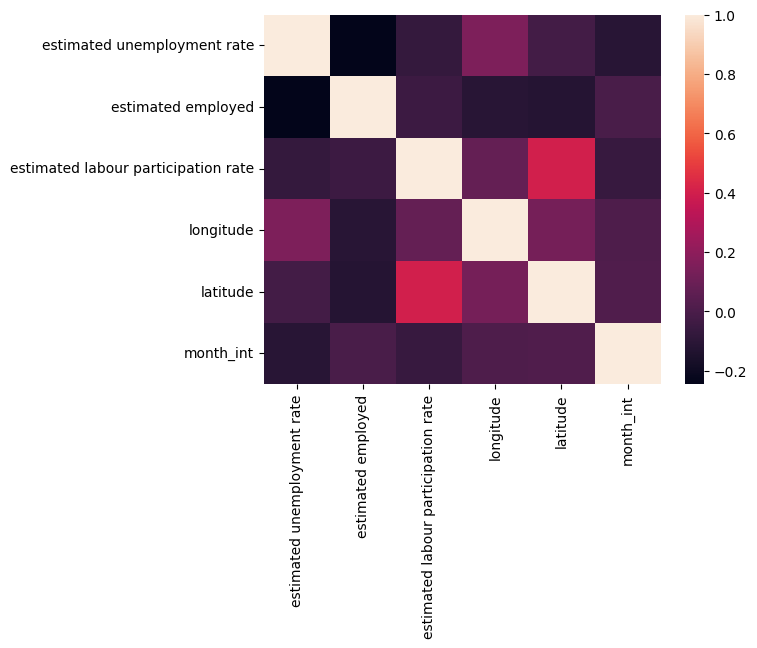

In [13]:
cormat=data.corr()
round(cormat,2)
sns.heatmap(cormat)

<Axes: title={'center': 'Indian Employee'}, xlabel='estimated employed', ylabel='Count'>

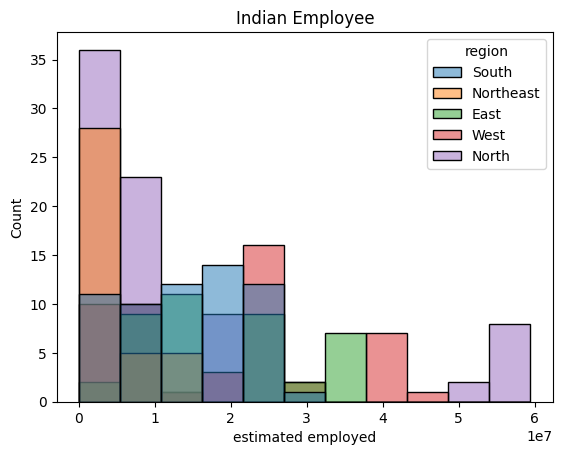

In [14]:
plt.title("Indian Employee")
sns.histplot(x='estimated employed',hue='region',data=data)

In [15]:
month = IND.month
unemployment_rate = IND["estimated unemployment rate"]
labour_participation_rate = IND["estimated labour participation rate"]

fig = go.Figure()

fig.add_trace(go.Bar(x = month, y = unemployment_rate, name= "Unemployment Rate"))
fig.add_trace(go.Bar(x = month, y = labour_participation_rate, name= "Labour Participation Rate"))

fig.update_layout(title="Uneployment Rate and Labour Participation Rate",
                  xaxis={"categoryorder":"array", "categoryarray":["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct"]})

fig.show()

In [16]:
fig = px.bar(IND, x='month',y='estimated employed', color='month',
             category_orders = {"month": ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct"]},
             title='estimated employed people from Jan 2020 to Oct 2020')

fig.show()

In [17]:
state = data.groupby(["state"])[["estimated unemployment rate", "estimated employed", "estimated labour participation rate"]].mean()
state = pd.DataFrame(state).reset_index()

In [18]:
fig = px.box(data,x='state',y='estimated unemployment rate',color='state',title='Unemployment rate')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [19]:
fig = px.bar(state, x='state', y="estimated unemployment rate", color="state", title="Average unemploment Rate (State)")
fig.update_layout(xaxis={'categoryorder':'total descending'})

fig.show()

In [20]:
fig = px.bar(data, x='state',y='estimated unemployment rate', animation_frame = 'month', color='state',
            title='Unemployment rate from Jan 2020 to Oct 2020 (State)')

fig.update_layout(xaxis={'categoryorder':'total descending'})

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"]=2000

fig.show()

In [21]:
fig = px.scatter_geo(data,'longitude', 'latitude', color="state",
                     hover_name="state", size="estimated unemployment rate",
                     animation_frame="month",scope='asia',title='Impack of lockdown on employement in India')

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000

fig.update_geos(lataxis_range=[5,40], lonaxis_range=[65, 100],oceancolor="lightblue",
    showocean=True)

fig.show()

In [22]:
data.region.unique()

array(['South', 'Northeast', 'East', 'West', 'North'], dtype=object)

In [23]:
region = data.groupby(["region"])[['estimated unemployment rate', "estimated employed", "estimated labour participation rate"]].mean()
region = pd.DataFrame(region).reset_index()

In [24]:
fig = px.scatter_matrix(data, dimensions=['estimated unemployment rate','estimated employed','estimated labour participation rate'], color='region')
fig.show()


In [25]:
fig = px.bar(region, x="region", y="estimated unemployment rate", color="region", title="Average Unemployment Rate (Region)")
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [26]:
fig = px.bar(data, x='region',y='estimated unemployment rate', animation_frame = 'month', color='state',
            title='Unemployment rate from Jan 2020 to Oct 2020')

fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000

fig.show()

In [27]:
unemployment = data.groupby(['region','state'])['estimated unemployment rate'].mean().reset_index()

unemployment.head()

,region,state,estimated unemployment rate
0,East,Bihar,19.471
1,East,Jharkhand,19.539
2,East,Odisha,6.462
3,East,West Bengal,10.192
4,North,Delhi,18.414


In [28]:
fig = px.sunburst(unemployment, path=['region','state'], values='estimated unemployment rate',
                  title= 'Unemployment rate in every State and Region', height=650)
fig.show()

In [29]:
before_lockdown = data[(data['month_int'] >= 1) & (data['month_int'] <4)]
after_lockdown = data[(data['month_int'] >= 4) & (data['month_int'] <=6)]

In [30]:
af_lockdown = after_lockdown.groupby('state')['estimated unemployment rate'].mean().reset_index()

lockdown = before_lockdown.groupby('state')['estimated unemployment rate'].mean().reset_index()
lockdown['unemployment rate before lockdown'] = af_lockdown['estimated unemployment rate']

lockdown.columns = ['state','unemployment rate before lockdown','unemployment rate after lockdown']
lockdown.head()

,state,unemployment rate before lockdown,unemployment rate after lockdown
0,Andhra Pradesh,5.700000,13.750000
1,Assam,4.613333,7.070000
2,Bihar,12.110000,36.806667
3,Chhattisgarh,8.523333,9.380000
4,Delhi,18.036667,25.713333


In [31]:
lockdown['rate change in unemployment'] = round(lockdown['unemployment rate before lockdown'] - lockdown['unemployment rate before lockdown']
                                                /lockdown['unemployment rate after lockdown'],2)

In [32]:
fig = px.bar(lockdown, x='state',y='rate change in unemployment',color='rate change in unemployment',
            title='Percentage change in Unemployment rate in each state after lockdown', template="ggplot2")
fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig.show()

In [33]:
# data represntation before and after the lockdown

before_lockdown = data[(data['month_int'] >= 1) & (data['month_int'] <4)]
after_lockdown = data[(data['month_int'] >= 4) & (data['month_int'] <=6)]

In [34]:
af_lockdown = after_lockdown.groupby('state')['estimated unemployment rate'].mean().reset_index()

lockdown = before_lockdown.groupby('state')['estimated unemployment rate'].mean().reset_index()
lockdown['unemployment rate before lockdown'] = af_lockdown['estimated unemployment rate']

lockdown.columns = ['state','unemployment rate before lockdown','unemployment rate after lockdown']
lockdown.head()

,state,unemployment rate before lockdown,unemployment rate after lockdown
0,Andhra Pradesh,5.700000,13.750000
1,Assam,4.613333,7.070000
2,Bihar,12.110000,36.806667
3,Chhattisgarh,8.523333,9.380000
4,Delhi,18.036667,25.713333


In [35]:
# Unemployment rate change after lockdown

lockdown['rate change in unemployment'] = round(lockdown['unemployment rate before lockdown'] - lockdown['unemployment rate before lockdown']
                                                /lockdown['unemployment rate after lockdown'],2)

In [36]:
fig = px.bar(lockdown, x='state',y='rate change in unemployment',color='rate change in unemployment',
            title='Percentage change in Unemployment rate in each state after lockdown', template="ggplot2")
fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig.show()